In [ ]:
import os
from pathlib import Path
import imageio, numpy
from PIL import Image, ImageDraw, ImageFont

def search_files(directory):
    mp4Path = []
    dataPath = {}
    path = Path(directory)
    for file in path.rglob("*"):  # 递归搜索所有文件
        if file.is_file():  # 确保是文件
            tmp = file.name[0:-4]
            extension = file.name[-3:]
            if extension == "mp4": 
                mp4Path.append(str(file))
            elif extension == "txt": 
                tmp2 = str(tmp).split("+")
                scene_name = tmp2[0]
                id = tmp2[1]
                scene_id = scene_name + ".mp4"
                if scene_id not in dataPath:
                    dataPath[scene_id] = {}
                dataPath[scene_id][id] = str(file)
            
            
            
    return mp4Path, dataPath

# 示例：搜索当前文件夹下的所有文件
mp4Path, dataPath = search_files("/home/jjlin/pluto/result")

mp4Path
dataPath




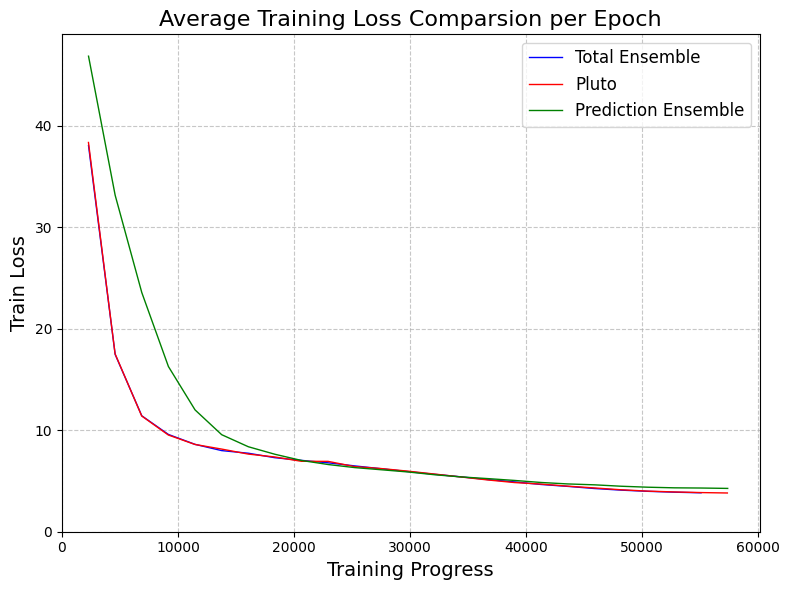

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
df = pd.read_csv('/home/jjlin/下载/wandb_export_2025-05-27T23_54_11.821+08_00.csv')

# 提取 trainer/global_step 作为 x 轴
global_steps = df['trainer/global_step'].dropna().astype(int)

# 提取 total ensemble 的数据，并确保与 global_steps 对齐
ensemble_mask = df['total ensemble - _step'].notna()
ensemble_steps = global_steps[ensemble_mask]
ensemble_loss = df['total ensemble - loss/train_loss_epoch'][ensemble_mask]

# 提取 pluto 的数据，并确保与 global_steps 对齐
pluto_mask = df['pluto - _step'].notna()
pluto_steps = global_steps[pluto_mask]
pluto_loss = df['pluto - loss/train_loss_epoch'][pluto_mask]

# 提取 pluto 的数据，并确保与 global_steps 对齐
MoE_mask = df['prediction ensemble - _step'].notna()
MoE_steps = global_steps[MoE_mask]
MoE_loss = df['prediction ensemble - loss/train_loss_epoch'][MoE_mask]


# 创建图形
plt.figure(figsize=(8, 6))

# 绘制 total ensemble 的训练损失曲线
plt.plot(ensemble_steps, ensemble_loss, 
         label='Total Ensemble', color='blue', linestyle='-', linewidth=1)

# 绘制 pluto 的训练损失曲线
plt.plot(pluto_steps*5, pluto_loss, 
         label='Pluto', color='red', linestyle='-', linewidth=1)

# 绘制 pluto 的训练损失曲线
plt.plot(MoE_steps, MoE_loss, 
         label='Prediction Ensemble', color='green', linestyle='-', linewidth=1)

# 添加标题和标签
plt.title('Average Training Loss Comparsion per Epoch', fontsize=16)
plt.xlabel('Training Progress', fontsize=14)
plt.ylabel('Train Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# 调整坐标轴范围以更好地显示数据
plt.xlim(left=0)
plt.ylim(bottom=0)

# 显示图形
plt.tight_layout()
plt.show()

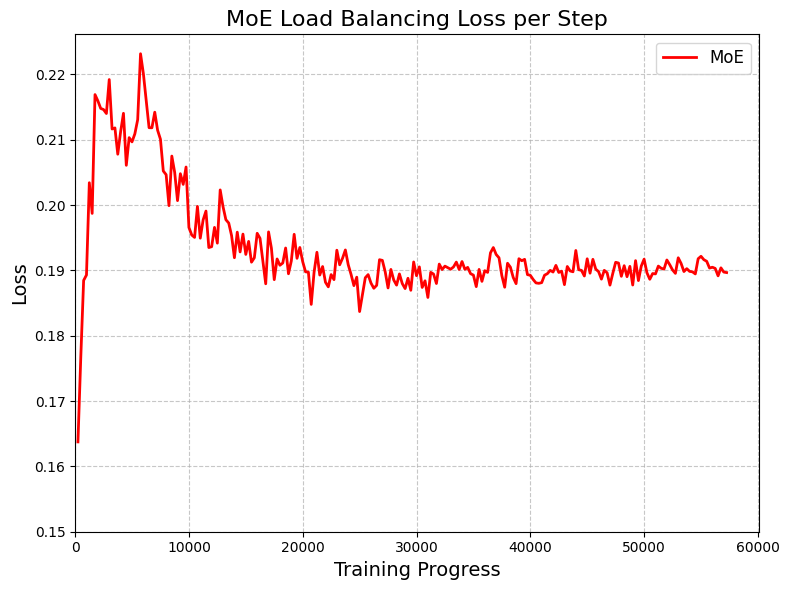

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
df = pd.read_csv('/home/jjlin/下载/wandb_export_2025-05-26T11_15_03.071+08_00.csv')
# 提取 trainer/global_step 作为 x 轴
global_steps = df['trainer/global_step'].dropna().astype(int)

# 提取 pluto 的数据，并确保与 global_steps 对齐
MoE_mask = df['MoE - _step'].notna()
MoE_steps = global_steps[MoE_mask]
MoE_loss = df['MoE - moe_loss_step'][MoE_mask]


# 创建图形
plt.figure(figsize=(8, 6))

# 绘制 pluto 的训练损失曲线
plt.plot(MoE_steps*5, MoE_loss, 
         label='MoE', color='red', linestyle='-', linewidth=2)

# 添加标题和标签
plt.title('MoE Load Balancing Loss per Step', fontsize=16)
plt.xlabel('Training Progress', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# 调整坐标轴范围以更好地显示数据
plt.xlim(left=0)
plt.ylim(bottom=0.15)

# 显示图形
plt.tight_layout()
plt.show()

In [23]:
import numpy as np
from scipy.signal import lfilter
 
def low_pass_filter(data, cutoff):
    b = [0.25, 0.5, 0.25]  # 简单的低通滤波器系数，例如三角窗滤波器
    a = [1.0]  # 分母系数为1，表示无延迟滤波器
    filtered_data = lfilter(b, a, data)
    return filtered_data
 
cutoff = 0.5  # 这里cutoff参数通常用于设计滤波器，具体值根据需要而定


In [227]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os


def load_data_from_mat(path):
    # 加载 .mat 文件
    mat_data = scipy.io.loadmat(path)

    # 显示 .mat 文件中的键（变量名）
    #print("Keys in the .mat file:", mat_data.keys())

    # print("Keys in the .mat file:", mat_data["data_3"].dtype.names)

    i = 1
    emergency = []
    traj_var = []
    prob_var = []
    traj_chosed = []
    final_score = []
    enrisk = {"preds_var": [], "preds_risk": [], "trajs_var": []}
    rule_based_scores = []
    final_scores = []
    step_time = []
    forward_time = []
    metrics = []
    TTC = []
    TTC_w = []
    MoE_prob = []
    velocity = []
    is_e_traj = False
    #if mat_data["1"]["e_traj_var"]:
    #    is_e_traj = True
    scenerio = mat_data[str(i)]["scenario_type"][0, 0]
    while str(i) in mat_data.keys():
        #print(mat_data[str(i)].dtype.names)
        emergency.append(mat_data[str(i)]["emergency"][0, 0][0, 0])
        traj_var.append(mat_data[str(i)]["traj_var"][0, 0][0, 0])
        prob_var.append(mat_data[str(i)]["prob_var"][0, 0][0, 0])
        final_score.append(mat_data[str(i)]["final_score"][0, 0][0, 0])
        final_scores.append(mat_data[str(i)]["final_scores"][0, 0][0])
        traj_chosed.append(mat_data[str(i)]["traj_chosed"][0, 0][0, 0])
        velocity.append(mat_data[str(i)]["velocity"][0, 0][0, 0])
        # rule_based_scores.append(mat_data[str(i)]["rule_based_scores"][0, 0])
        #print(mat_data[str(i)]["enrisk"])
        try:
            enrisk["preds_var"].append(mat_data[str(i)]["enrisk"].item()["preds_var"][0, 0][0])
        except Exception as e:
            pass
        try:
            enrisk["trajs_var"].append(mat_data[str(i)]["enrisk"].item()["trajs_var"][0, 0][0, 0])
        except Exception as e:
            pass
        try:
            MoE_prob.append(mat_data[str(i)]["probs"][0, 0])
        except Exception as e:
            pass
        step_time.append(mat_data[str(i)]["step_time"][0, 0][0, 0])
        forward_time.append(mat_data[str(i)]["forward_time"][0, 0][0, 0])
        metrics.append(mat_data[str(i)]["metric"][0, 0].T)
        TTC.append(mat_data[str(i)]["ttc"][0, 0][0])  # TTC of every cand traj
        TTC_w.append(mat_data[str(i)]["weighted_ttc"][0, 0][0])
        i += 1
    time = range(1, i)
    return {'time':time, 
            'f_time': forward_time,
            'velocity': velocity,
            'emergency':emergency, 
            'traj_var':traj_var, 
            'prob_var':prob_var, 
            'final_score':final_score, 
            'final_scores':final_scores, 
            'rule_based_scores':rule_based_scores, 
            'enrisk':enrisk, 
            'step_time':step_time, 
            'metrics': metrics, 
            'TTC': TTC, 
            'TTC_w':TTC_w,
            'traj_chosed': traj_chosed,
            'scenario_type': scenerio}


def get_mat_files(folder_path, postfix = '.mat'):
    mat_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(postfix):
                absolute_path = os.path.abspath(os.path.join(root, file))
                mat_files.append(absolute_path)
    return mat_files

def get_field(mat_files, idx, field):
    #print(type(idx))
    if type(idx) == type(" "):
        search_res = [path for path in mat_files 
            if os.path.basename(path) == (idx+".mat")]
        #print(search_res)
        return load_data_from_mat(search_res[0])[field]
    return load_data_from_mat(mat_files[idx])[field]

def load_summary_data_from_mat(path):
    mat_data = scipy.io.loadmat(path)
    metrics = []
    TTC = []
    TTC_w = []
    velocity = []
    #if mat_data["1"]["e_traj_var"]:
    #    is_e_traj = True
    i = 1
    if_emergency = False
    while str(i) in mat_data.keys():
        # metrics.append(mat_data[str(i)]["metrics"][0, 0][0])
        TTC.append(mat_data[str(i)]["ttc"][0, 0][0])  # TTC of every cand traj
        TTC_w.append(mat_data[str(i)]["weighted_ttc"][0, 0][0])
        # velocity.append(mat_data[str(i)]["velocity"][0, 0][0, 0])
        if mat_data[str(i)]["emergency"][0, 0][0, 0]:
            if_emergency = True
        i += 1
    # mean_metrics = cal_mean_metric(metrics)
    mean_velocity = np.mean(np.stack(velocity))
    return mean_velocity, if_emergency, 


def cal_mean_metric(metrics, traj_chosed):
    sum_metrics = np.zeros(6)
    for idx, metrics_per_step in enumerate( metrics):
        sum_metrics += metrics_per_step[traj_chosed[idx]]
    mean_metrics = sum_metrics / len(metrics) * 100
    return mean_metrics

#pred_var
# emergency
#rule_based_scores[0]

# load_data_from_mat("/home/jjlin/pluto_dev/result/log/2021.05.12.22.00.38_veh-35_01008_01518_4677efd7512d5723_te_t.ckpt.mat")


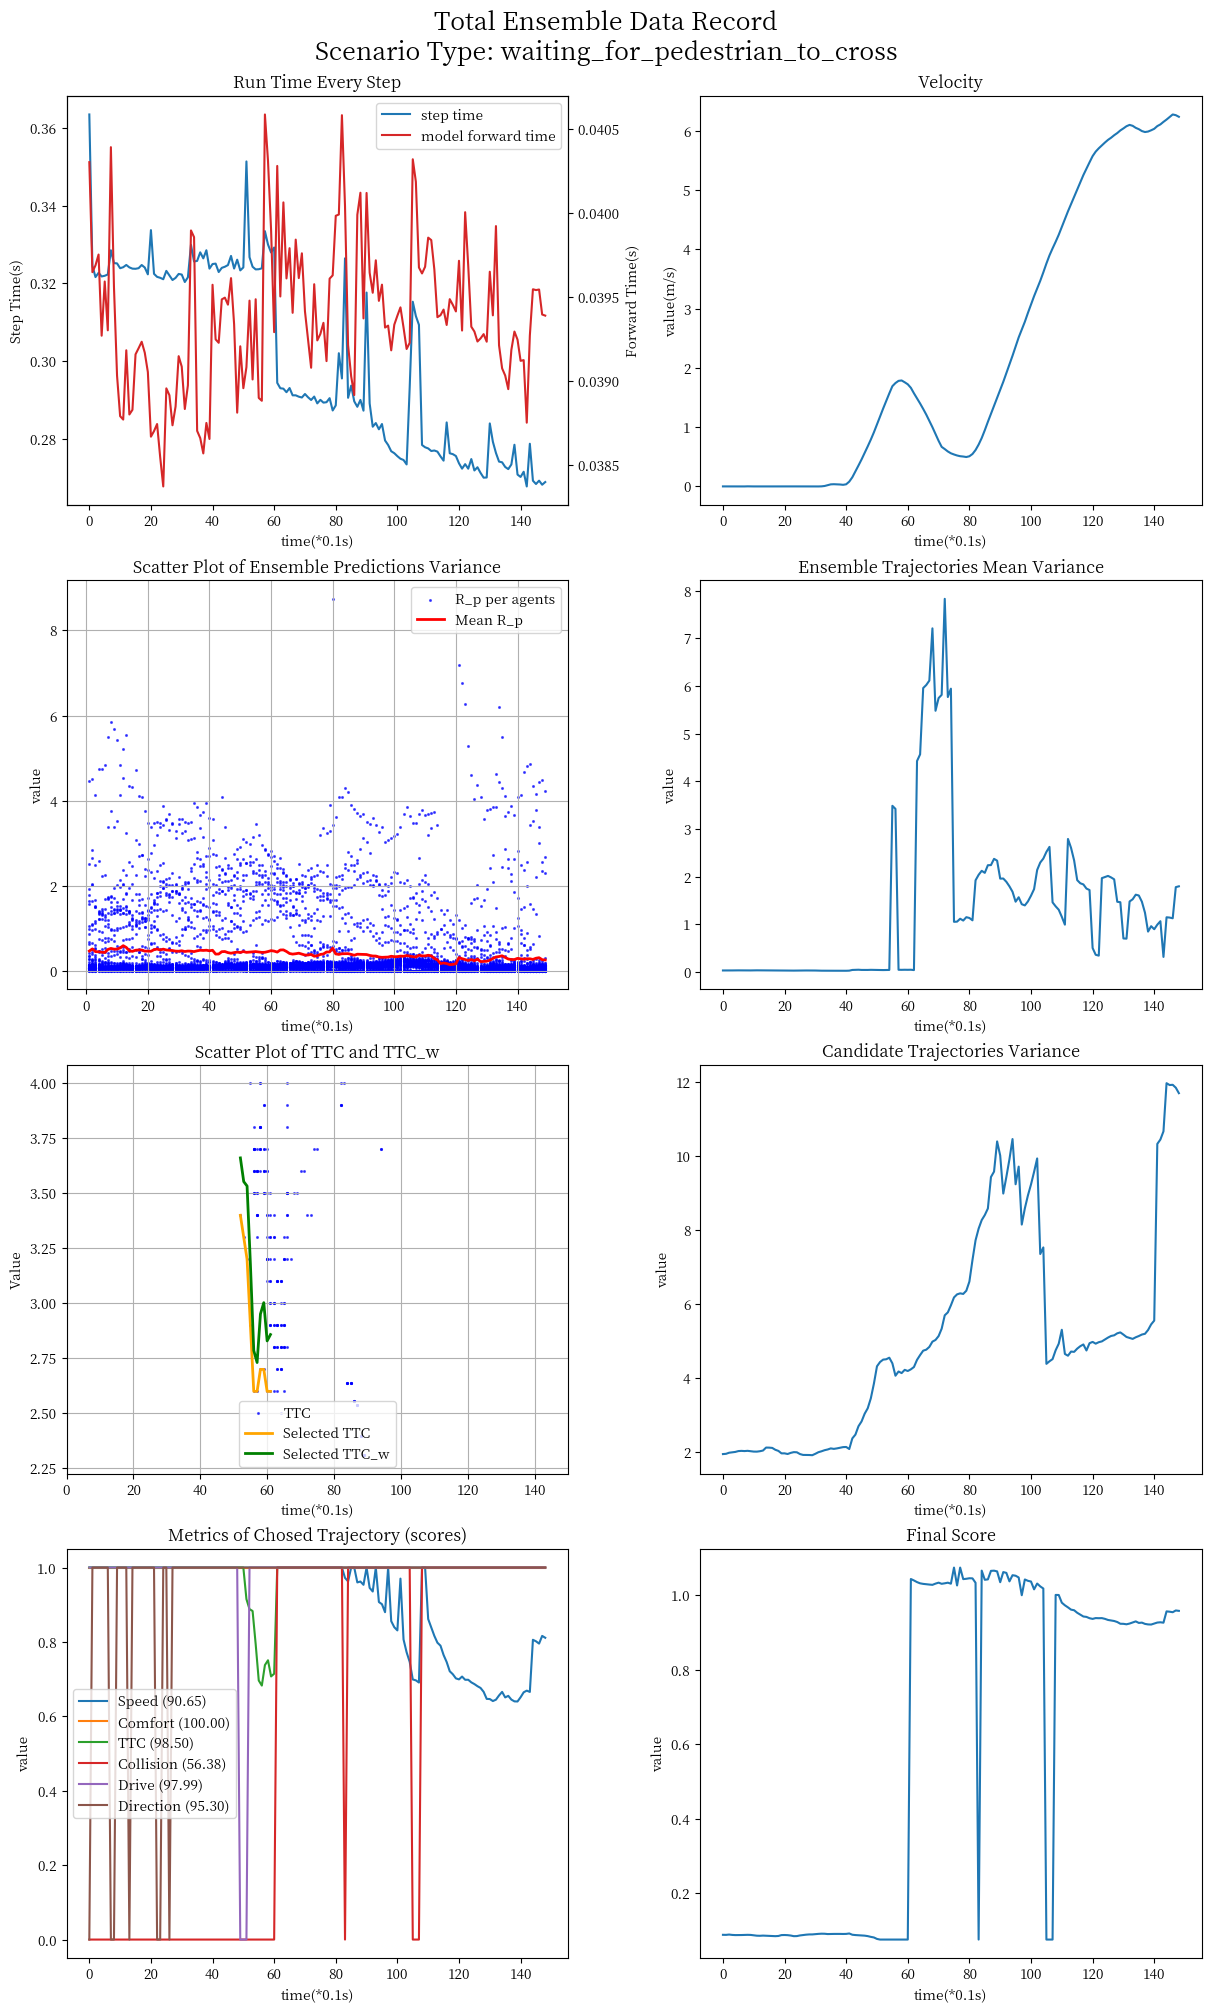

In [244]:
path = '/home/jjlin/pluto_dev/result/log/2021.07.16.18.06.21_veh-38_04933_05307_542f281bb36a56b7_te_t.ckpt.mat'
data = load_data_from_mat(path)
#print(data['metrics'][0].shape)

fig, ax = plt.subplots(4,2,figsize=(12,20), constrained_layout=True)

plt.suptitle('Total Ensemble Data Record\nScenario Type: '+ data['scenario_type'][0], fontsize=18)

ax[0,0].plot(data['step_time'],  label='step time')
ax[0,0].set_title("Run Time Every Step")
ax[0,0].set_xlabel("time(*0.1s)")
ax[0,0].set_ylabel("Step Time(s)")
ax2 = ax[0,0].twinx()
ax2.plot(data['f_time'],  label='model forward time', color='tab:red')
ax2.set_ylabel("Forward Time(s)")
for i, e in enumerate(data['emergency']):
    if False:
        ax[1,1].axvline(x=i, color='r',linestyle='--', linewidth=1)

# 合并图例
lines1, labels1 = ax[0,0].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax[0,0].legend(lines1 + lines2, labels1 + labels2, loc='upper right')



ax[0,1].plot(data['velocity'],  label='velocity')
ax[0,1].set_title("Velocity")
ax[0,1].set_xlabel("time(*0.1s)")
ax[0,1].set_ylabel("value(m/s)")
for i, e in enumerate(data['emergency']):
    if e:
        ax[0,1].axvline(x=i, color='r',linestyle='--', linewidth=1)



# 绘制散点图
for t, arr in zip(data['time'], data['enrisk']['preds_var']):
    ax[1,0].scatter([t] * arr.shape[0], arr,s=1.5, color='blue', alpha=0.6, label='R_p per agents' if t == data['time'][0] else "")

# 计算每个时间点的平均值
means = [np.mean(arr) for arr in data['enrisk']['preds_var']]

# 绘制平均值折线图
ax[1,0].plot(data['time'], means, color='red',linestyle='-', linewidth=2, label='Mean R_p')

# 添加标签和标题
ax[1,0].set_xlabel("time(*0.1s)")
ax[1,0].set_ylabel("value")
ax[1,0].set_title('Scatter Plot of Ensemble Predictions Variance')
ax[1,0].legend()
ax[1,0].grid(True)
for i, e in enumerate(data['emergency']):
    if False:
        ax[1,0].axvline(x=i, color='r',linestyle='--', linewidth=1)
#ax[1,1].plot([100 if e else 0 for e in emergency],  label='final score')


ax[1,1].plot(data['enrisk']['trajs_var'],  label='R_t')
ax[1,1].set_title("Ensemble Trajectories Mean Variance")
ax[1,1].set_xlabel("time(*0.1s)")
ax[1,1].set_ylabel("value")
for i, e in enumerate(data['emergency']):
    if False:
        ax[2,1].axvline(x=i, color='r',linestyle='--', linewidth=1)


# 绘制散点图
for t, arr in zip(data['time'], data['TTC']):
    ax[2,0].scatter([t] * arr.shape[0], arr,s=1.5, color='blue', alpha=0.6, label='TTC' if t == data['time'][0] else "")
    
ax[2,0].plot(data['time'], [d[data['traj_chosed'][idx]]  for idx, d in enumerate(data['TTC'])], color='orange',linestyle='-', linewidth=2, label='Selected TTC')
ax[2,0].plot(data['time'], [d[data['traj_chosed'][idx]]  for idx, d in enumerate(data['TTC_w'])], color='green',linestyle='-', linewidth=2, label='Selected TTC_w')
ax[2,0].set_xlim([0, 150])

# 添加标签和标题
ax[2,0].set_xlabel("time(*0.1s)")
ax[2,0].set_ylabel("Value")
ax[2,0].set_title('Scatter Plot of TTC and TTC_w')
ax[2,0].legend(loc='lower center')
ax[2,0].grid(True)
for i, e in enumerate(data['emergency']):
    if False:
        ax[2,0].axvline(x=i, color='r',linestyle='--', linewidth=1)


ax[2,1].plot(data['traj_var'],  label='traj var')
ax[2,1].set_title("Candidate Trajectories Variance")
ax[2,1].set_xlabel("time(*0.1s)")
ax[2,1].set_ylabel("value")



mean_metrics = cal_mean_metric(data['metrics'], data['traj_chosed'])

ax[3,0].plot([d[data['traj_chosed'][idx]]  for idx, d in enumerate(data['metrics'])],  label='step time')
ax[3,0].set_title("Metrics of Chosed Trajectory (scores)")
ax[3,0].set_xlabel("time(*0.1s)")
ax[3,0].set_ylabel("value")
for i, e in enumerate(data['emergency']):
    if False:
        ax[3,0].axvline(x=i, color='r',linestyle='--', linewidth=1)
ax[3,0].legend((
                f'Speed ({mean_metrics[0]:.2f})', 
                f'Comfort ({mean_metrics[1]:.2f})', 
                f'TTC ({mean_metrics[2]:.2f})', 
                f'Collision ({mean_metrics[3]:.2f})', 
                f'Drive ({mean_metrics[4]:.2f})', 
                f'Direction ({mean_metrics[5]:.2f})'))

ax[3,1].plot(data['final_score'],  label='final score')
ax[3,1].set_title("Final Score")
ax[3,1].set_xlabel("time(*0.1s)")
ax[3,1].set_ylabel("value")
for i, e in enumerate(data['emergency']):
    if False:
        ax[2,1].axvline(x=i, color='r',linestyle='--', linewidth=1)


plt.show()

In [ ]:
dir = '/home/jjlin/pluto_dev/result/log'
mat_files = get_mat_files(dir)
mean_metrics = [load_summary_data_from_mat(file) for file in mat_files]
mean_metrics = np.stack(mean_metrics)
scores = np.mean(mean_metrics, axis=0)
print(f'Progress\t{scores[0]:.2f} \nSpeed\t\t{scores[1]:.2f}\nComfort\t\t{scores[2]:.2f} \nTTC\t\t{scores[3]:.2f}\nCollision\t{scores[4]:.2f} \nDrive\t\t{scores[5]:.2f} \nDirection\t{scores[6]:.2f}')
print(f'Final scores\t{np.mean(scores):.4f}')

可用中文字体: ['Noto Sans CJK JP', 'Noto Serif CJK JP', 'Noto Sans CJK JP', 'Noto Sans CJK JP', 'Noto Mono', 'Noto Serif CJK JP', 'Noto Sans CJK JP', 'Noto Serif CJK JP', 'Noto Serif CJK JP', 'Noto Sans CJK JP', 'Noto Serif CJK JP', 'Noto Serif CJK JP', 'Noto Sans CJK JP', 'Noto Serif CJK JP', 'Noto Sans CJK JP']


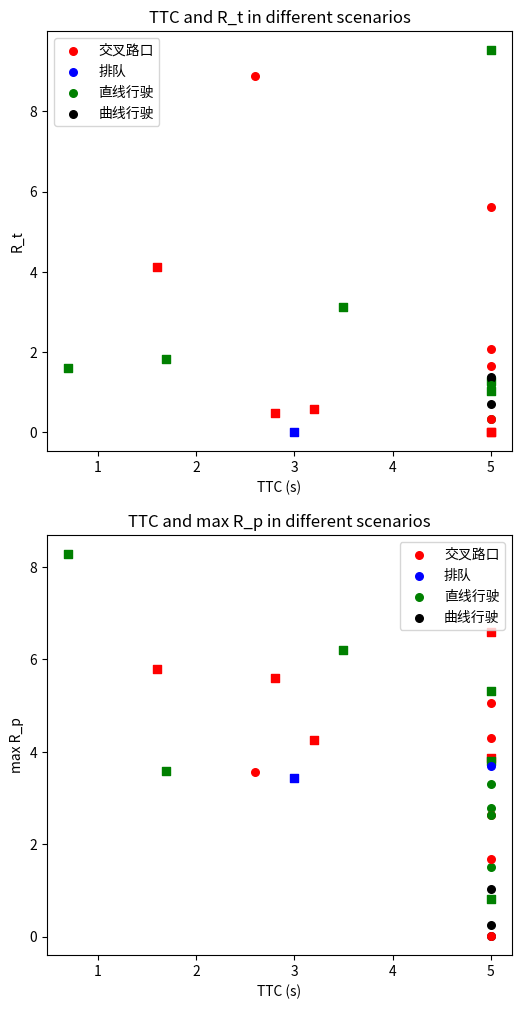

In [169]:
dir = '/home/jjlin/pluto_dev/result/log'
mat_files = get_mat_files(dir)
# 查找系统可用的中文字体
import matplotlib.font_manager as fm
font_list = [f.name for f in fm.fontManager.ttflist if 'Noto' in f.name or 'Source Han' in f.name]
print("可用中文字体:", font_list)
# 设置全局中文字体（根据系统选择可用字体）
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

fig, ax = plt.subplots(2,1,figsize=(6,12))


colors = ['red', 'blue', 'green','black', ]
labels = ['交叉路口', '排队', '直线行驶', '曲线行驶']
shape = ['o', 's']  # 无冲突 有冲突
idxs = [('2021.08.17.16.57.11_veh-08_01200_01636_0926c6e359475121_te_t.ckpt',100,0, 0),
        ('2021.06.14.19.22.11_veh-38_01480_01860_f12256faa4f55140_te_t.ckpt',10,1, 0),
        ('2021.06.03.13.55.17_veh-35_00073_00426_8c0319e2f56757b1_te_t.ckpt',40,2, 0),
        ('2021.08.17.18.54.02_veh-45_00665_01065_066edcd1f1b05a73_te_t.ckpt',90,3, 0),

        ('2021.08.17.16.57.11_veh-08_01200_01636_9e30155b8bb55fd9_te_t.ckpt',80,2, 1),
        ('2021.09.16.15.12.03_veh-42_01037_01434_d7731a3e06ed5c93_te_t.ckpt',60,0, 1),
        ('2021.06.28.16.29.11_veh-38_03263_03766_2f5ce5e16db45b6a_te_t.ckpt',70,2, 1),
        ('2021.08.17.16.57.11_veh-08_01200_01636_0926c6e359475121_te_t.ckpt',10,0, 1),
        
        ('2021.06.14.19.22.11_veh-38_01480_01860_f12256faa4f55140_te_t.ckpt',10,1, 1),
        ('2021.10.11.02.57.41_veh-50_01522_02088_8118581b1f485e70_te_t.ckpt',140,0, 0),
        ('2021.07.24.20.37.45_veh-17_00015_00375_14fed57585b9512b_te_t.ckpt',50,2, 1),
        ('2021.05.25.14.16.10_veh-35_01690_02183_53a4d8c2be4c5456_te_t.ckpt',50,1, 0),
        ('2021.06.14.17.26.26_veh-38_04544_04920_c0a458382dff5232_te_t.ckpt',90,2, 1),
        ('2021.09.16.15.12.03_veh-42_01037_01434_47e3ee94d3f55983_te_t.ckpt',10,0, 1),
        ('2021.06.28.16.57.59_veh-26_00016_00484_91d115c8e4ab545d_te_t.ckpt',130,2, 0),
        ('2021.10.01.19.16.42_veh-28_02011_02410_e13a07505f655976_te_t.ckpt',40,2, 0),
        ('2021.10.06.07.26.10_veh-52_00006_00398_e8a0fdff24e1514e_te_t.ckpt',100,3, 0),
        ('2021.08.17.17.17.01_veh-45_02314_02798_da3175b14f6c51f5_te_t.ckpt',90,0, 1),
        ('2021.09.16.15.12.03_veh-42_01037_01434_d7731a3e06ed5c93_te_t.ckpt',120,0, 0),
        ('2021.07.24.20.37.45_veh-17_00015_00375_c97a17c7106b5552_te_t.ckpt',100,3, 0),
        ('2021.06.09.14.58.55_veh-35_01894_02311_fc7fab57261b5f5a_te_t.ckpt',100,0, 0),
        ('2021.07.09.17.06.37_veh-35_00258_00748_bbbc50c811175f12_te_t.ckpt',20,2, 1),
        ('2021.09.16.15.12.03_veh-42_01037_01434_9acab0969e25540f_te_t.ckpt',40,0, 0),
        ('2021.08.17.16.57.11_veh-08_01200_01636_9e30155b8bb55fd9_te_t.ckpt',10,0, 1),
        ('2021.06.09.17.23.18_veh-38_02526_03027_a5933de094ed5c14_te_t.ckpt',40,0, 0),
        ('2021.07.24.23.50.16_veh-17_01696_02071_f9aefbb6609e5f6b_te_t.ckpt',100,2, 1),
        ('2021.06.28.16.57.59_veh-26_00016_00484_91d115c8e4ab545d_te_t.ckpt',100,2, 0),
]
for idx, step, t, s in idxs:
    ttc = np.min(get_field(mat_files, idx, "TTC")[step])
    ttc = np.clip(ttc, 0, 5)
    enrisk1 = get_field(mat_files, idx, "enrisk")['trajs_var'][step]
    enrisk2 = np.max(get_field(mat_files, idx, "enrisk")['preds_var'][step])
    enrisk3 = get_field(mat_files, idx, "traj_var")[step]
    #enrisk = np.log10(enrisk)
    ax[0].scatter(ttc, enrisk1, c=colors[t], marker=shape[s], s=30)
    ax[1].scatter(ttc, enrisk2, c=colors[t], marker=shape[s], s=30)
    #ax[2].scatter(ttc, enrisk3, c=colors[t], marker=shape[s], s=30)

ax[0].legend(labels)
ax[1].legend(labels)
#ax[2].legend(labels)
#plt.yscale('log')
# 添加标题和标签
ax[0].set_title('TTC and R_t in different scenarios')
ax[1].set_title('TTC and max R_p in different scenarios')
#ax[1].set_title('TTC and T_v in different scenarios')
#plt.ylim([0, 10])
ax[0].set_xlabel('TTC (s)')
ax[0].set_ylabel('R_t')
ax[1].set_xlabel('TTC (s)')
ax[1].set_ylabel('max R_p')
#ax[2].set_xlabel('TTC (s)')
#ax[2].set_ylabel('T_v')
plt.show()

视频信息: 10.0 FPS, 总帧数: 149, 时长: 14.9秒


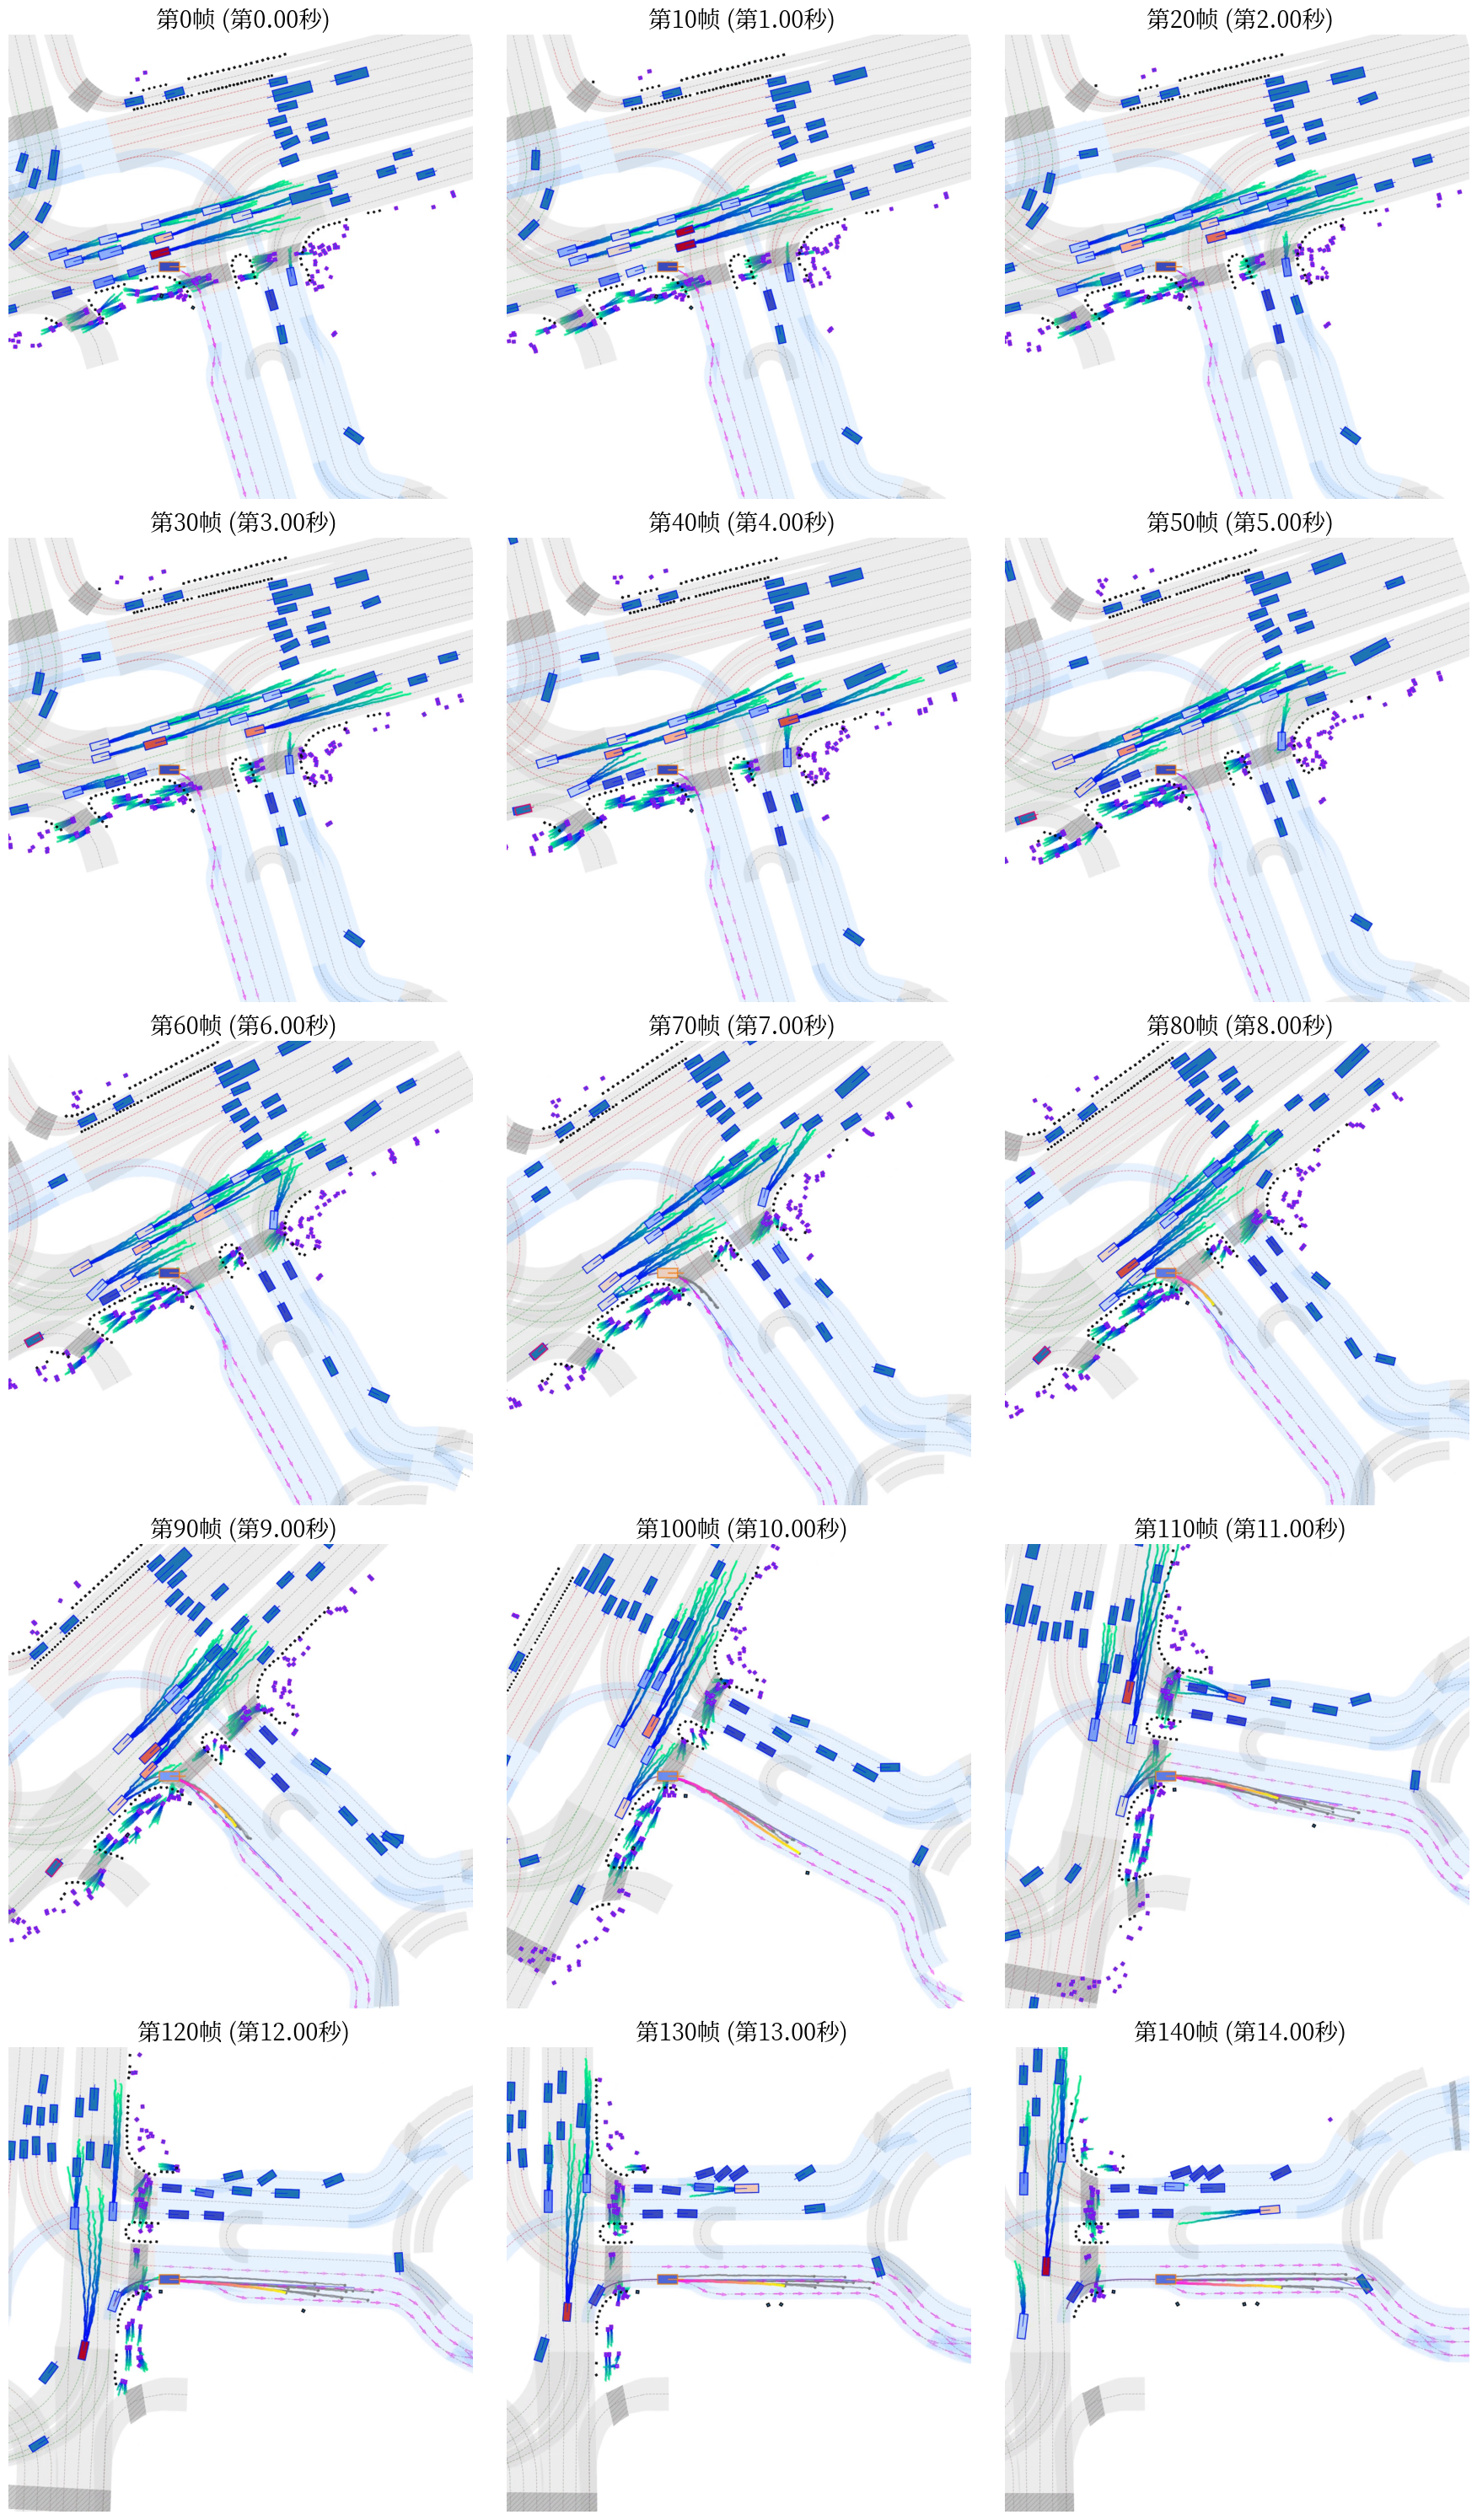

In [180]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from matplotlib.gridspec import GridSpec

def extract_and_combine_frames(video_path, frame_indices, cols=3, figsize=(18, 30)):
    """
    从视频中提取指定帧并组合成一张大图
    
    参数:
        video_path: 视频文件路径
        frame_indices: 要提取的帧索引列表(从0开始)
        cols: 每行显示的图片数
        figsize: 输出图像大小
    """
    # 设置中文字体(确保系统有中文字体)
    plt.rcParams['font.sans-serif'] = ['Noto Serif CJK JP']
    plt.rcParams['axes.unicode_minus'] = False
    
    # 打开视频文件
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("无法打开视频文件")
        return
    
    # 计算行数
    rows = int(np.ceil(len(frame_indices) / cols))
    
    # 创建图形和网格布局
    fig = plt.figure(figsize=figsize)
    gs = GridSpec(rows, cols, figure=fig)
    
    # 获取视频信息
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = total_frames / fps
    
    print(f"视频信息: {fps:.1f} FPS, 总帧数: {total_frames}, 时长: {duration:.1f}秒")
    
    for i, frame_idx in enumerate(frame_indices):
        # 设置读取位置
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()
        
        if not ret:
            print(f"无法读取帧 {frame_idx}")
            continue
            
        # 转换颜色空间 BGR -> RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # 计算子图位置
        row = i // cols
        col = i % cols
        
        # 添加子图
        ax = fig.add_subplot(gs[row, col])
        ax.imshow(frame_rgb)
        
        # 计算时间戳(秒)
        timestamp = frame_idx / fps
        
        # 设置标题(帧索引和时间戳)
        ax.set_title(f" 第{frame_idx}帧 (第{timestamp:.2f}秒)", fontsize=20)
        ax.axis('off')
    
    # 添加大标题
    video_name = video_path.split('/')[-1]
    # fig.suptitle(f"视频 '{video_name}' 关键帧提取\n(总时长: {duration:.1f}秒)", fontsize=14, y=1.02)
    
    # 调整布局
    plt.tight_layout()
    plt.show()
    
    # 释放视频资源
    cap.release()

# 使用示例
video_path = "/home/jjlin/pluto_dev/result_minimini/video/2021.07.16.18.06.21_veh-38_04933_05307_542f281bb36a56b7_te_t.ckpt.mp4"  # 替换为你的视频路径
selected_frames = [0, 10, 20, 30,
                   40, 50, 60, 70,
                   80,90,100,110,
                   120, 130, 140]  # 选择要提取的帧索引

extract_and_combine_frames(video_path, selected_frames, cols=3)

In [263]:
def weighted_merge_rows(row1, row2, weight1=0.5, weight2=0.5):
    """
    对两行 DataFrame 进行加权融合
    
    参数:
        row1, row2: 要合并的两行数据 (DataFrame 单行)
        weight1, weight2: 对应的权重 (建议 weight1 + weight2 = 1)
    
    返回:
        合并后的新行 (DataFrame)
    """
    # 验证输入
    if not isinstance(row1, pd.DataFrame) and isinstance(row2, pd.DataFrame):
        raise ValueError("输入必须是 Pandas DataFrame")
    if row1.shape[0] != 1 or row2.shape[0] != 1:
        raise ValueError("每行数据应该只有一行")
    if not all(row1.columns == row2.columns):
        raise ValueError("两行的列不匹配")
    
    # 创建结果行的副本
    merged = row1.copy()
    
    # 对数值列进行加权平均
    numeric_cols = row1.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        if col == 'num_scenarios':
            merged[col] = row1[col].values + row2[col].values
        else:
            merged[col] = (weight1 * row1[col].values + weight2 * row2[col].values)/(weight1+weight2)
    
    # 对非数值列处理（这里选择保留第一个 DataFrame 的值）
    non_numeric_cols = row1.select_dtypes(exclude=['number']).columns
    for col in non_numeric_cols:
        # 也可以实现更复杂的逻辑，比如对字符串列进行拼接等
        merged[col] = row1[col].values
    
    return merged




import pandas as pd
# 读取Parquet文件
df = pd.read_parquet('/media/jjlin/database1/nuplan/exp/exp/simulation/closed_loop_nonreactive_agents/pluto_planner/mini_demo_scenario/aggregator_metric/closed_loop_nonreactive_agents_weighted_average_metrics_2025.05.29.02.54.11.parquet')
# 获取最后一行（包含表头）
pluto = df.tail(1)
# 显示结果
print(pluto.to_string(index=False))


df = pd.read_parquet('/media/jjlin/database1/nuplan/exp/exp/simulation/closed_loop_nonreactive_agents/pluto_planner/mini_demo_scenario/aggregator_metric/closed_loop_nonreactive_agents_weighted_average_metrics_2025.05.31.02.49.42.parquet')
# 获取最后一行（包含表头）
te_no_enrisk1 = df.tail(1)
weight1 = 137
df = pd.read_parquet('/media/jjlin/database1/nuplan/exp/exp/simulation/closed_loop_nonreactive_agents/pluto_planner/mini_demo_scenario/aggregator_metric/closed_loop_nonreactive_agents_weighted_average_metrics_2025.05.31.09.39.56.parquet')
weight2 = 15
# 获取最后一行（包含表头）
te_no_enrisk2 = df.tail(1)
te_no_enrisk = weighted_merge_rows(te_no_enrisk1, te_no_enrisk2, weight1, weight2)
# 显示结果
print(te_no_enrisk.to_string(index=False))



# 读取Parquet文件
df = pd.read_parquet('/media/jjlin/database1/nuplan/exp/exp/simulation/closed_loop_nonreactive_agents/pluto_planner/mini_demo_scenario/aggregator_metric/closed_loop_nonreactive_agents_weighted_average_metrics_2025.05.29.11.28.31.parquet')
weight1 = 137
te1 = df.tail(1)
df = pd.read_parquet('/media/jjlin/database1/nuplan/exp/exp/simulation/closed_loop_nonreactive_agents/pluto_planner/mini_demo_scenario/aggregator_metric/closed_loop_nonreactive_agents_weighted_average_metrics_2025.05.29.14.45.38.parquet')
weight2 = 15
# 获取最后一行（包含表头）
te2 = df.tail(1)
te = weighted_merge_rows(te1, te2, weight1, weight2)

# 显示结果
print(te.to_string(index=False))


# 读取Parquet文件
df = pd.read_parquet('/media/jjlin/database1/nuplan/exp/exp/simulation/closed_loop_nonreactive_agents/pluto_planner/mini_demo_scenario/aggregator_metric/closed_loop_nonreactive_agents_weighted_average_metrics_2025.05.31.01.02.25.parquet')
# 获取最后一行（包含表头）
pe_no_enrisk = df.tail(1)
# 显示结果
print(pe_no_enrisk.to_string(index=False))

# 读取Parquet文件
df = pd.read_parquet('/media/jjlin/database1/nuplan/exp/exp/simulation/closed_loop_nonreactive_agents/pluto_planner/mini_demo_scenario/aggregator_metric/closed_loop_nonreactive_agents_weighted_average_metrics_2025.05.29.15.56.00.parquet')
# 获取最后一行（包含表头）
pe = df.tail(1)
# 显示结果
print(pe.to_string(index=False))


# 读取Parquet文件
df = pd.read_parquet('/media/jjlin/database1/nuplan/exp/exp/simulation/closed_loop_nonreactive_agents/pluto_planner/mini_demo_scenario/aggregator_metric/closed_loop_nonreactive_agents_weighted_average_metrics_2025.05.31.09.58.53.parquet')
# 获取最后一行（包含表头）
MoE_no_enrisk = df.tail(1)
# 显示结果
print(MoE_no_enrisk.to_string(index=False))

# 读取Parquet文件
df = pd.read_parquet('/media/jjlin/database1/nuplan/exp/exp/simulation/closed_loop_nonreactive_agents/pluto_planner/mini_demo_scenario/aggregator_metric/closed_loop_nonreactive_agents_weighted_average_metrics_2025.05.30.10.14.48.parquet')
# 获取最后一行（包含表头）
MoE = df.tail(1)
# 显示结果
print(MoE.to_string(index=False))


   scenario log_name scenario_type  num_scenarios planner_name  aggregator_type corners_in_drivable_area  drivable_area_compliance  driving_direction_compliance  ego_is_comfortable  ego_is_making_progress ego_jerk ego_lane_change ego_lat_acceleration ego_lon_acceleration ego_lon_jerk  ego_progress_along_expert_route ego_yaw_acceleration ego_yaw_rate  no_ego_at_fault_collisions  speed_limit_compliance  time_to_collision_within_bound    score
final_score     None   final_score          156.0 PlutoPlanner weighted_average                     None                  0.974359                           1.0            0.897436                0.942308     None            None                 None                 None         None                         0.805817                 None         None                    0.980769                0.992655                        0.942308 0.840401
   scenario log_name scenario_type  num_scenarios planner_name  aggregator_type corners_in_drivable_area  driv

<class 'str'>


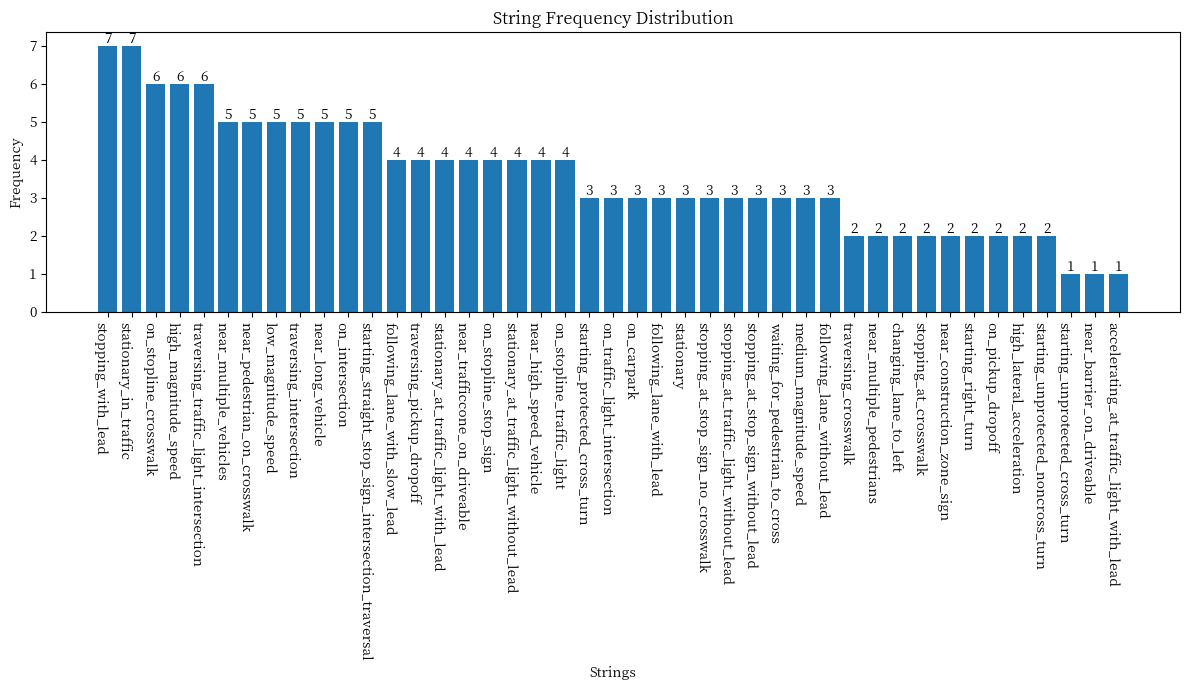


LaTeX Table Output:

\begin{tabular}{|c|c|c|c|}
\hline
Index & String & Length & Frequency \\
\hline
0 & stopping\_with\_lead  & 7 \\
1 & stationary\_in\_traffic  & 7 \\
2 & on\_stopline\_crosswalk  & 6 \\
3 & high\_magnitude\_speed  & 6 \\
4 & traversing\_traffic\_light\_intersection  & 6 \\
5 & near\_multiple\_vehicles  & 5 \\
6 & near\_pedestrian\_on\_crosswalk  & 5 \\
7 & low\_magnitude\_speed  & 5 \\
8 & traversing\_intersection  & 5 \\
9 & near\_long\_vehicle  & 5 \\
10 & on\_intersection  & 5 \\
11 & starting\_straight\_stop\_sign\_intersection\_traversal  & 5 \\
12 & following\_lane\_with\_slow\_lead  & 4 \\
13 & traversing\_pickup\_dropoff  & 4 \\
14 & stationary\_at\_traffic\_light\_with\_lead  & 4 \\
15 & near\_trafficcone\_on\_driveable  & 4 \\
16 & on\_stopline\_stop\_sign  & 4 \\
17 & stationary\_at\_traffic\_light\_without\_lead  & 4 \\
18 & near\_high\_speed\_vehicle  & 4 \\
19 & on\_stopline\_traffic\_light  & 4 \\
20 & starting\_protected\_cross\_turn  & 3 \\
21 & on

In [259]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

def analyze_and_visualize_strings(string_list):
    # 统计字符串频率
    string_counter = Counter(string_list)
    strings = list(string_counter.keys())
    counts = list(string_counter.values())
    
    # 按频率降序排序
    sorted_indices = np.argsort(counts)[::-1]
    sorted_strings = [strings[i] for i in sorted_indices]
    sorted_counts = [counts[i] for i in sorted_indices]
    
    # 创建直方图
    plt.figure(figsize=(12, 7))
    bars = plt.bar(range(len(sorted_strings)), sorted_counts)
    
    # 添加标签和标题
    plt.title('String Frequency Distribution')
    plt.xlabel('Strings')
    plt.ylabel('Frequency')
    plt.xticks(range(len(sorted_strings)), sorted_strings, rotation=-90, ha='right')
    
    # 在柱子上方显示数值
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height)}',
                 ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # 生成LaTeX表格
    latex_table = "\\begin{tabular}{|c|c|c|c|}\n"
    latex_table += "\\hline\n"
    latex_table += "Index & String & Length & Frequency \\\\\n"
    latex_table += "\\hline\n"
    
    for idx, (string, count) in enumerate(zip(sorted_strings, sorted_counts)):
        # 处理LaTeX特殊字符
        string_repr = string.replace('\\', '\\textbackslash ') \
                           .replace('_', '\\_') \
                           .replace('&', '\\&') \
                           .replace('%', '\\%') \
                           .replace('$', '\\$') \
                           .replace('#', '\\#') \
                           .replace('{', '\\{') \
                           .replace('}', '\\}') \
                           .replace('^', '\\^{}') \
                           .replace('~', '\\textasciitilde')
        
        latex_table += f"{idx} & {string_repr}  & {count} \\\\\n"
    
    latex_table += "\\hline\n"
    latex_table += "\\end{tabular}"
    
    return latex_table

# 示例用法
if __name__ == "__main__":
    # 测试数据
    files = get_mat_files('/home/jjlin/pluto_dev/result_pluto/log/')
    scenarios = []
    for idx,file in enumerate(files):
        scenarios.append(get_field(files, idx, 'scenario_type').item() )
    print(type(scenarios[0]))
    
    # 调用函数
    latex_output = analyze_and_visualize_strings(scenarios)
    
    # 打印LaTeX表格
    print("\nLaTeX Table Output:\n")
    print(latex_output)

In [ ]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

def analyze_simulation_results(mat_files):
    # 初始化存储结果的列表
    avg_step_times = []
    avg_f_times = []
    collision_flags = []
    # 用于准确率分析的变量
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    tau = 0.5  # 设定阈值
    
    for file in mat_files:
        data = load_data_from_mat(file)
        
        # 计算平均时间
        avg_step_times.append(np.mean(data['step_time']))
        avg_f_times.append(np.mean(data['f_time']))
        
        # 检测碰撞（连续5帧emergency为True）
        emergency = data['emergency']
        collision = False
        for i in range(len(emergency)-4):
            if all(emergency[i:i+5]):
                collision = True
                break
        collision_flags.append(collision)
        
        # 评估准确率
        if 'preds_var' in data['enrisk'] and len(data['enrisk']['preds_var']) > 0:
            preds_var = data['enrisk']['preds_var'][0]  # 取第一个预测值
            if preds_var >= tau and collision:
                true_positives += 1
            elif preds_var >= tau and not collision:
                false_positives += 1
            elif preds_var < tau and collision:
                false_negatives += 1
    
    # 计算准确率指标
    total_samples = len(mat_files)
    collision_rate = sum(collision_flags) / total_samples * 100
    
    # 只有当有预测数据时才计算准确率
    if true_positives + false_positives + false_negatives > 0:
        precision = true_positives / (true_positives + false_positives) * 100 if (true_positives + false_positives) > 0 else 0
        recall = true_positives / (true_positives + false_negatives) * 100 if (true_positives + false_negatives) > 0 else 0
        accuracy_metrics = {
            'precision': precision,
            'recall': recall,
            'true_positives': true_positives,
            'false_positives': false_positives,
            'false_negatives': false_negatives
        }
    else:
        accuracy_metrics = None
    
    return {
        'avg_step_times': avg_step_times,
        'avg_f_times': avg_f_times,
        'collision_flags': collision_flags,
        'collision_rate': collision_rate,
        'accuracy_metrics': accuracy_metrics
    }

def plot_results(results):
    # 绘制平均时间分布图
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.bar(range(len(results['avg_step_times'])), results['avg_step_times'], alpha=0.7, label='Step Time')
    plt.bar(range(len(results['avg_f_times'])), results['avg_f_times'], alpha=0.7, label='Forward Time')
    plt.xlabel('Simulation Sample')
    plt.ylabel('Time (seconds)')
    plt.title('Average Computation Time per Simulation')
    plt.legend()
    
    # 绘制碰撞率图
    plt.subplot(1, 2, 2)
    collision_rate = results['collision_rate']
    non_collision_rate = 100 - collision_rate
    plt.bar(['Collision', 'Non-Collision'], [collision_rate, non_collision_rate], color=['red', 'green'])
    plt.ylabel('Percentage (%)')
    plt.title(f'Collision Rate (Total: {len(results["collision_flags"])} Simulations)')
    
    plt.tight_layout()
    plt.show()
    
    # 打印准确率指标（如果有）
    if results['accuracy_metrics']:
        metrics = results['accuracy_metrics']
        print("\nRisk Prediction Accuracy Metrics:")
        print(f"Precision: {metrics['precision']:.2f}%")
        print(f"Recall: {metrics['recall']:.2f}%")
        print(f"True Positives: {metrics['true_positives']}")
        print(f"False Positives: {metrics['false_positives']}")
        print(f"False Negatives: {metrics['false_negatives']}")
    else:
        print("\nNo risk prediction data available for accuracy analysis.")

# 使用示例
if __name__ == "__main__":
    # 替换为你的.mat文件所在文件夹路径
    folder_path = "path/to/your/mat/files"
    mat_files = get_mat_files(folder_path)
    
    if not mat_files:
        print("No .mat files found in the specified directory.")
    else:
        results = analyze_simulation_results(mat_files)
        plot_results(results)
        print(f"\nOverall Collision Rate: {results['collision_rate']:.2f}%")